<a href="https://colab.research.google.com/github/ashishkumar30/Zerodha_Live_Automate_Trading-_using_AI_ML_on_Indian_stock_market-using-basic-python/blob/master/Live_BOT_(1)_on_RSI_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#       BUY-SELL  BOT on RSI  

* This is the automated BUY and SELL code for zerodha , it will buy order and sell that order on indian exchange based on buy/sell strategy implemented on code.

BOT STRATEGY:- 
* Place an order when RSI is greater then 30,when high breaks next high,place BUY SL order on current high when BUY SL order implemented on ZERODHA place an order of SELL on lowest lowcand if  RSI cross70:cancel the SELL SL bid place MARET order of BUY bid.Full strategy mention below.

Import All libraries required for BOT

In [0]:
import time
import secrets 
import threading
import webbrowser
import numpy as np
import pandas as pd
from pytz import timezone
from pprint import pprint
from datetime import datetime
from time import gmtime, strftime
from kiteconnect import KiteTicker 
from kiteconnect import KiteConnect
from IPython.display import clear_output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#   LOGIN TO ZERODHA 


 Enter api key & api secret

In [0]:
# API your KEY and API secter 
api_key='******************* @@enter your api key here@@@**************' 
api_secret='**********************@@enter your api key here****************'
print(KiteConnect(api_key,api_secret).login_url())
#webbrowser.open_new_tab(KiteConnect(api_key,api_secret).login_url())

 Insert token generated from link and pase here : 

In [0]:
link= "fghjnbvghjnbvghujq"

 Getting Details of Account

In [0]:
''' 
ao=link.split("=")
o_o=min(ao)
strin=o_o.split("&")
n_strin=strin[0]
''' 
kite = KiteConnect(api_key=api_key)
data = kite.generate_session(link,api_secret)
kite.set_access_token(data["access_token"])
data


* *  *  * * 


#  Enter  All Inputs for the RSI BOT

* *  *  * * 

Finding "Token" only if required

In [0]:
print("input token name")
token_n=str(input())
print("enter exchange")
exc=str(input())
pd.DataFrame(kite.instruments(exc))[["tradingsymbol","instrument_token","name","exchange"]][pd.DataFrame(kite.instruments(exc))[["tradingsymbol","instrument_token","name","exchange"]]['tradingsymbol'].str.contains(token_n)] 

* *  *  * * 



* *  *  * * 

Example:  ( Inputs are case sensitive )
1. Trading symbol             ... ( "SUNPHARMA ")
2. exchange                   ... (" NSE / BSE " / " CDS ")
3. productt                   ... (" CNC" / " NRML " )
4. Quantity                   ... (1 , 2 , 3 etc ! how much u want)
5. Instrument token           ... ( Ex SUNPHARMA instrument token is 857857 )
6. RSI in condition           ...       ( 30 )
7. RSI out condition          ...       ( 31 )
8. rofit booking RSI condition...       ( 70 )
9. Time frame of candels      ...   ( "minute"/ "10 minute" )
10. starting data of Data     ...   ( "2019-06-05" )
11. Ending data Of Data       ...   ( "2019-07-02" )

In [0]:
ttradingsymbol ="SBIN"
eexchange      ="NSE"
productt       ="MIS"
qu             =1
RSI_VAL        =30
RSI_VAL2       =30
profit_booking =70
time_frame     ="minute"
sdate          ="2019-06-05"
todate         ="2019-10-02"
#Do not change here#
buy_add=.50
sell_add=.50
ttoken=int(pd.DataFrame(kite.ltp(eexchange+":"+ttradingsymbol)).iloc[-2,0])

# FOR TESTING 

* Testing  and Status  (Only if required)
- To check that the above BOT details are filled succesfully or not by placing an MARKET order  :- (remove # before code )

 Place Order

In [0]:
kite.place_order(variety="regular",tradingsymbol=ttradingsymbol,quantity=qu,exchange=eexchange,order_type='MARKET',transaction_type='BUY',product=productt,tag="abTST")

 Order Status

In [0]:
display(pd.DataFrame(kite.orders())[["tradingsymbol","instrument_token","status","order_id","quantity","price","trigger_price","order_type","exchange_update_timestamp","exchange",'tag',"validity",  "average_price","pending_quantity"]])

# Position


In [0]:
display(pd.DataFrame(kite.positions()["net"])[["tradingsymbol","average_price","buy_m2m","buy_price","buy_quantity","buy_value","close_price","sell_m2m","sell_price","sell_quantity","sell_value","unrealised","value","day_buy_price","day_buy_quantity","day_buy_value","day_sell_price","product","quantity","realised"]])           

# Holdings

In [0]:
display(pd.DataFrame(kite.holdings())[["tradingsymbol","instrument_token","pnl","average_price","close_price","collateral_quantity","collateral_type","day_change","day_change_percentage","exchange","isin","last_price","price","product","quantity","realised_quantity","t1_quantity" ]])      

Historical Data

In [0]:
display(pd.DataFrame(kite.historical_data(ttoken, sdate, todate,time_frame,0))[["date","open","high","low","close","volume"]].tail(10))

* *  *  * * 

#       " Do not change anything in program from here "

#  Problem Algorithm

1. Place an order when RSI is greater then 30
2. note all candels when rsi comes below 30 and again goes greater then 30
3. when high of high hits
4. place BUY SL order  on current high 
5. if BUY SL order implemented on ZERODHA
6. place an order of SELL on lowest low which is stored when rsi comes below 30 and goes greater 30
7. wair for conditions 
8. if RSI cross70:
    cancel the SELL SL bid 
    place MARET order of BUY Bid
    and run programe from starting
9. if sell SL bid executed , run program from starting

# Design Algorithm 

# Flow Chart 

-NA-

# Verification of Testing 

Tested on All Cases (SUNPHARMA, ADANIPOWER)

# Implementation Of Coding 

In [0]:
InteractiveShell.ast_node_interactivity = "all"
changesver=[5]
a=[0]
b=[0]
hh=[]
ii=[]
ggg=[]
firs=[]
inpu=[]
glkk=[]
akki=[]
ame=[21]
check=[]
bii_by=[]
orprice=[]
datalow=[]
progrun=[]
rsichec=[]
datarsi=[0]
buyprice=[]
beak_high=[]
sellorder=[]
org_price=[]
limitprice=[]
sellorder1=[]
orderplaced=[]
prog_starts=[]
high_to_high=[]
rsi_strategy=[]
sell_strategy=[]
rsi_condition=[]
orgtimersicondition=[]
sellbit_execute_limit=[]
buy_order_sell_status=[]
buy_order_info_buy_orid=[]
buy_order_info_buy_symbol=[]
buy_order_info_buy_status=[]
buy_order_info_buy_status=[]
buy_order_info_buy_orderid=[]
buy_order_info_sell_orderid=[]
class ThreadingData(object):
    global app_z_status
    global app_z_order
    global app_z_order_type
    global app_z_transaction_type
    app_z_status=[]
    app_z_order=[]
    app_z_order_type=[]
    app_z_transaction_type=[]
    def __init__(self):
        thread = threading.Thread(target=self.run, args=())
        thread.daemon = True
        thread.start()
    def run(self):
        access_token=token
        api_key=api_key
        logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')
        clear_output(wait=True)
        kws = KiteTicker(api_key, access_token, debug=True)
        global app_z_status
        global app_z_order
        global app_z_order_type
        global app_z_transaction_type
        tokens = [ttoken]
        print("Tokens length", len(tokens))
        def on_connect(ws, response):
            logging.debug("on connect: {}".format(response))
            ws.subscribe(tokens)
            ws.set_mode(ws.MODE_FULL, tokens)
        def on_close(ws, code, reason):
            logging.error("closed connection on close: {} {}".format(code, reason))
        def on_error(ws, code, reason):
            logging.error("closed connection on error: {} {}".format(code, reason))
        def on_noreconnect(ws):
            logging.error("Reconnecting the websocket failed")
        def on_reconnect(ws, attempt_count):
            logging.debug("Reconnecting the websocket: {}".format(attempt_count))
        def on_order_update(ws, data):
            z_status=data['status']
            z_order=data["order_id"]
            z_order_type=data["order_type"]
            z_transaction_type=["transaction_type"]
            app_z_status.append(z_status)
            app_z_order.append(z_order)
            app_z_order_type.append(z_order_type)
            app_z_transaction_type.append(z_transaction_type)
            print(app_z_status)
            print(app_z_order)
            print(app_z_order_type)
            print(app_z_transaction_type)
            print(data)
        kws.on_connect      = on_connect
        kws.on_close        = on_close
        kws.on_error        = on_error
        kws.on_noreconnect  = on_noreconnect
        kws.on_reconnect    = on_reconnect
        kws.on_order_update = on_order_update
        kws.connect()
def ashi():
    while(True):
        InteractiveShell.ast_node_interactivity = "all"
        km=datetime.now().minute
        ks=datetime.now().second
        if km%1==0 and ks==1:
            clear_output(wait=True)
            z=kite.historical_data(ttoken, sdate, todate,time_frame,0)
            za=pd.DataFrame(z)
            rsi_period=14
            chg=za["close"].diff(1)
            gain=chg.mask(chg<0,0) 
            loss=chg.mask(chg>0,0)
            avg_gain=gain.ewm(com=rsi_period-1,min_periods=rsi_period).mean()
            avg_loss=loss.ewm(com=rsi_period-1,min_periods=rsi_period).mean()
            rs =abs(avg_gain / avg_loss)
            rsi =100 -(100/(1+rs))
            za['rsi']=rsi
            def bidatrema(df,period):
                df['hl']=abs(df['high']-df['low'])
                df['hpc']=abs(df['high']-df['close'].shift())
                df['lpc']=abs(df['low']-df['close'].shift())
                df['tr']=df[['hl','hpc','lpc']].max(axis=1)
                df['ATR']=pd.DataFrame.ewm(df["tr"], span=period,min_periods=period).mean()
                df.drop(["hl","hpc","lpc","tr"],axis = 1 , inplace =True)
            bidatrema(za,14)
            p=za.iloc[-1,6]
            o=za.iloc[-2,2]
            a.append(p)
            b.append(o)
            def avg_ha(x):
                a=list(modf(round(x,3)))
                d=str(a[0])
                aa=str(d[0:2])
                try:
                    ab=str(d[2])
                except:
                    ab='0'
                try:
                    ac=str(d[3])
                except:
                    ac='0'
                try:
                    ad=str(d[4])
                except:
                    ad='0'
                c=aa+ab+ac+ad
                b=0
                if a[0]!=0:
                    astr=c
                    a0=astr[0]
                    a1=astr[1]
                    a3=int(astr[2])
                    a2=int(astr[3:5])
                    if a2>=0 and a2<25:
                        a2=0
                    elif a2>=25 and a2<75:
                        a2=5
                    elif a2>=75 and a2<=99:
                        a3+=1
                        a2=0
                    aint=a0+a1+str(a3)+str(a2)
                    a[0]=float(aint)
                for k in a:
                    b+=k
                return b
            InteractiveShell.ast_node_interactivity = "all"
            print(" \n \t \t \t \t  ZERODHA RSI 'Relative Strength Index BOT'",changesver)
            print(" \n \t \t \t \t  ZERODHA RSI 'Relative Strength Index BOT'")
            now_utc = datetime.now(timezone('UTC'))
            now_asia = now_utc.astimezone(timezone('Asia/Kolkata'))
            now_asia = now_asia.strftime("%Y-%m-%d _ %H:%M:%S ")
            klp1=now_asia
            prog_starts.append(klp1)
            print("\n ")
            print("Zerodha RSI BOT start Time             "  , prog_starts[0])
            print("\n ")
            print("BOT working succeesfully on time:      "  , now_asia )
            print("\n ")
            print("Trading symbol is",ttradingsymbol,"Token is",ttoken,"Exchange is",eexchange,"RSI condition is",RSI_VAL,RSI_VAL2,"and profit booking RSI level is",profit_booking," \t \n and product type is",productt,"Quantity is",qu,"time frame for Historical Data is",time_frame,"Starting and Ending Date of Historical Data is",sdate,todate)
            print("\n ")
            #display(data)
            print("RSI condition Occured but high Not break" , len(progrun))
            if 2 in rsichec:
                print("RSI condition's occured at time    "  ,*rsi_condition,sep='\n')
            print("\n ")
            print("\n ")
            if 2 in high_to_high:
                print("High-High breaks condition time    "  ,*beak_high,sep='\n')
            print("\n ")
            print("Current  ATR status is                 "  , za.iloc[-1,7])
            print("Current  RSI status is                 "  , a[-1])
            print("Previous RSI status is                 "  , a[-2])
            print("Current  HIGH is                       "  , b[-1])
            print("Previous HIGH satus is                 "  , b[-2])
            
            print("Lowest-Low when enter in RSI Condition "  , datalow)
            print("RSI at ENTRY in Condition Rough detail "  , datarsi[-1])
            print("\n ")
            print("\t  \t \t   BUY & SELL details and Number of Order Placed \n ")
            print("Orignal Price while placing order is   "  , orprice)
            print("BUY bid trigger price is               "  , buyprice)
            print("BUY bid price is                       "  , limitprice)
            print("SELL SL trigger price is               "  , sellorder)
            print("SELL stoploss is price is              "  , sellorder1)
            print("Number of BUY/SELL order till now is                   " , len(orderplaced))
            print("Number of time BOT complete RSI profit booking strategy" , len(rsi_strategy))
            print("Number of time BOT complet with execution of sell bid  " , len(sell_strategy))
            if 0 in check:
                print(" BUY bid Order Symbol              "  , buy_order_info_buy_symbol)
                print(" BUY bid Order Status              "  , buy_order_info_buy_status)
                print(" BUY bid Order id                  "  , buy_order_info_buy_orid)
                print(" BUY bid placed of                 "  , buy_order_info_buy_symbol, "and order id  is", buy_order_info_buy_orid)
            if 0 in sellbit_execute_limit:
                print(" SELL Order Status                 "  , buy_order_sell_status)
                print(" SELL Order id                     "  , buy_order_info_sell_orderid)
                print(" BUY Order executed on zerodha and SELL bid placed Order of",ttradingsymbol,"status is",buy_order_sell_status,"order id is",buy_order_info_sell_orderid)
            print("\n ")
            if 0 in check:
                if 0 in sellbit_execute_limit:
                    lll=str(buy_order_info_sell_orderid[0])
                    kneww8=pd.DataFrame(kite.orders())[["tradingsymbol","status","order_id","quantity"]]
                    zc898,=kneww8[kneww8.order_id== lll].index
                    in898=int(zc898)
                    if "COMPLETE" in kneww8.loc[in898,"status"]:
                        print("YES Order Already Executed of SL ")
                        a.clear()
                        b.clear()
                        hh.clear()
                        ii.clear()
                        ggg.clear()
                        ame.clear()
                        a.append(0)
                        b.append(0)
                        firs.clear()
                        inpu.clear()
                        glkk.clear()
                        akki.clear()
                        check.clear()
                        bii_by.clear()
                        orprice.clear()
                        datarsi.clear()
                        datalow.clear()
                        buyprice.clear()
                        datarsi.append(0)
                        sellorder.clear()
                        org_price.clear()
                        limitprice.clear()
                        sellorder1.clear()
                        sellbit_execute_limit.clear()
                        buy_order_sell_status.clear()
                        buy_order_info_buy_orid.clear()
                        buy_order_info_buy_symbol.clear()
                        buy_order_info_buy_status.clear()
                        buy_order_info_buy_status.clear()
                        buy_order_info_buy_orderid.clear()
                        buy_order_info_sell_orderid.clear()
                        print(" Cycle complete with execution of SELL bid   ")
                        orderplaced.append(1)
                        sell_strategy.append(1)
                        ashi()
                    if za.iloc[-1,6]>=profit_booking:
                        lll=buy_order_info_sell_orderid[0]
                        print("SL order Cancel id is : ",buy_order_info_sell_orderid,kite.cancel_order("regular",order_id=lll, parent_order_id=None))
                        print("Market order placed and BOT starts again",kite.place_order(variety="regular",tradingsymbol=ttradingsymbol,quantity=qu,exchange=eexchange,order_type='MARKET',transaction_type='SELL',product=productt,tag="RSImkt"))               
                        a.clear()
                        b.clear()
                        hh.clear()
                        ii.clear()
                        ggg.clear()
                        ame.clear()
                        a.append(0)
                        b.append(0)
                        firs.clear()
                        inpu.clear()
                        glkk.clear()
                        akki.clear()
                        check.clear()
                        bii_by.clear()
                        datarsi.clear()
                        orprice.clear()
                        datalow.clear()
                        buyprice.clear()
                        sellorder.clear()
                        org_price.clear()
                        datarsi.append(0)
                        limitprice.clear()
                        sellorder1.clear()
                        sellbit_execute_limit.clear()
                        buy_order_sell_status.clear()
                        buy_order_info_buy_orid.clear()
                        buy_order_info_buy_symbol.clear()
                        buy_order_info_buy_status.clear()
                        buy_order_info_buy_status.clear()
                        buy_order_info_buy_orderid.clear()
                        buy_order_info_sell_orderid.clear()
                        print(" This Cycle completed with RSI strategy ")
                        rsi_strategy.append(1)
                        orderplaced.append(1)
                        ashi()
                    else:
                        pass
                if 0 not in glkk:
                    kkkstr=str(buy_order_info_buy_orid[0])
                    kneww=pd.DataFrame(kite.orders())[["tradingsymbol","status","order_id","quantity"]]
                    zc89,=kneww[kneww.order_id== kkkstr].index
                    in899=int(zc89)
                    if "COMPLETE" in kneww.loc[in899,"status"]:
                        print(" YES! BUY bid Executed ")
                        xel=min(datalow)-(za.iloc[-1,7]*.25)
                        triggerpriceis=avg_ha(xel)
                        sellorder.append(triggerpriceis)
                        xelm=triggerpriceis-sell_add
                        stoplossis=avg_ha(xelm)
                        sellorder1.append(stoplossis)
                        print("Buy Limit order executed on zerodha and now SELL order placed")        
                        print("Sell Stoploss order placed and SL trigger price is ", triggerpriceis,"and stoploss is",stoplossis)
                        listt1=int(kite.place_order( variety="regular",tradingsymbol=ttradingsymbol,quantity=qu,exchange=eexchange,order_type='SL',stoploss= triggerpriceis,trigger_price=stoplossis,transaction_type='SELL',product=productt,tag="RSIsel"))
                        listtt2="STATUS"
                        buy_order_sell_status.append(listtt2)
                        zkak=int(listt1)
                        buy_order_info_sell_orderid.append(zkak)
                        print(buy_order_sell_status)
                        print(buy_order_info_sell_orderid)
                        sellbit_execute=secrets.randbelow(1)
                        sellbit_execute_limit.append(sellbit_execute)
                        glk=secrets.randbelow(1)
                        glkk.append(glk)
                    else:
                        pass    
                else:
                    pass
            if 0 in bii_by:
                if 0 not in akki:
                    if 21 in ame:
                        orgprice=za.iloc[-1,2]
                        orprice.append(orgprice)
                        exx=(za.iloc[-1,2]+(za.iloc[-1,7]*.25))
                        cur_high=avg_ha(exx)
                        exxx=cur_high+buy_add
                        lim_price=avg_ha(exxx)
                        buyprice.append(cur_high) 
                        limitprice.append(lim_price)
                        org_price.append(orgprice)
                        print("Congrats ! One Limit BUY Order placed Price is", lim_price , "and trigger_price is ", cur_high)
                        list_buy_symbol=ttradingsymbol
                        list_buy_status="STATUS"
                        buy_order_info_buy_symbol.append(list_buy_symbol)
                        buy_order_info_buy_status.append(list_buy_status)
                        buy_order_info_buy_orid.append(kite.place_order(variety="regular",tradingsymbol=ttradingsymbol,quantity=qu,exchange=eexchange,order_type='SL',price=lim_price ,trigger_price=cur_high,transaction_type='BUY',product=productt,tag="RSIbuy"))         
                        print(" BUY ORDER SYMBOL ",buy_order_info_buy_symbol)
                        print(" BUY ORDER STATUS ",buy_order_info_buy_status)
                        print(" BUY ORDER ID IS  ",buy_order_info_buy_orid)
                        biiiii=secrets.randbelow(1)
                        akki.append(biiiii)
                        p=secrets.randbelow(1)
                        check.append(p)
                    else:
                        pass
                else:
                    pass
            if 0 not in bii_by:
                if 2 not in firs:
                    if za.iloc[-2,6]>= RSI_VAL  and za.iloc[-1,6]<=RSI_VAL:
                        rsichec.append(2)
                        rsi_condition.append(now_asia)
                        fiss=2
                        apa=1
                        firs.append(fiss)
                        inpu.append(apa)
                    else:
                        pass
                if 1 in inpu:
                    datalow.append(za.iloc[-1,3])
                    datarsi.append(za.iloc[-1,6])
                    if za.iloc[-1,6]>=RSI_VAL2:
                        print(" Programe satisfied RSI condition ")
                        if za.iloc[-2,2] < za.iloc[-1,2]:
                            print("High breaks High condition satisfy")
                            high_to_high.append(2)
                            beak_high.append(now_asia)
                            bii = secrets.randbelow(1)
                            bii_by.append(bii)    
                        else:
                            progrun.append(1)
                            bii_by.clear()
                            firs.clear()
                            inpu.clear()
                            datalow.clear()
                            datarsi.clear()
                            datarsi.append(0)
                    else:
                        pass
                else:
                    pass
            else:
                pass
ashi()

 
 	 	 	 	  ZERODHA RSI 'Relative Strength Index BOT' [5]
 
 	 	 	 	  ZERODHA RSI 'Relative Strength Index BOT'

 
Zerodha RSI BOT start Time              2019-08-31 _ 21:26:07 

 
BOT working succeesfully on time:       2019-08-31 _ 21:27:05 

 
Trading symbol is SBIN Token is 779521 Exchange is NSE RSI condition is 30 30 and profit booking RSI level is 70  	 
 and product type is MIS Quantity is 1 time frame for Historical Data is minute Starting and Ending Date of Historical Data is 2019-06-05 2019-10-02

 
RSI condition Occured but high Not break 0

 

 

 
Current  ATR status is                  0.41822857770302235
Current  RSI status is                  50.23005471188229
Previous RSI status is                  50.32567294164271
Current  HIGH is                        273.6
Previous HIGH satus is                  273.6
Lowest-Low when enter in RSI Condition  []
RSI at ENTRY in Condition Rough detail  0

 
	  	 	   BUY & SELL details and Number of Order Placed 
 
Orignal Price whil

# Analysis of Program

Absolute Analysis =

Relative Analysis =

 * *  *  * * 

In [0]:
print(" \n \t \t \t \t \t ---- ALL THE HOLDINGS YOU HAVE ON THIS ACCOUNT----     ")
display(pd.DataFrame(kite.holdings())[["tradingsymbol","instrument_token","pnl","average_price","close_price","collateral_quantity","collateral_type","day_change","day_change_percentage","exchange","last_price","isin","price","product","quantity","realised_quantity","t1_quantity" ]])      
print(" \n \t \t \t \t \t ---- ALL THE POSITONS YOU HAVE ON THIS ACCOUNT----     ")
display(pd.DataFrame(kite.positions()["net"])[["tradingsymbol","average_price","buy_m2m","buy_price","buy_quantity","buy_value","close_price","sell_m2m","sell_price","sell_quantity","sell_value","unrealised","value","day_buy_price","day_buy_quantity","day_buy_value","day_sell_price","product","quantity","realised"]].head())
print(" \n \t \t \t \t \t ---- ALL THE ORDERS YOU HAVE ON THIS ACCOUNT----     ")
display(pd.DataFrame(kite.orders())[["tradingsymbol","transaction_type","order_id","quantity","order_type","exchange_update_timestamp",'tag',"quantity","status"]])

 
 	 	 	 	 	 ---- ALL THE HOLDINGS YOU HAVE ON THIS ACCOUNT----     


,tradingsymbol,instrument_token,pnl,average_price,close_price,collateral_quantity,collateral_type,day_change,day_change_percentage,exchange,last_price,isin,price,product,quantity,realised_quantity,t1_quantity
0,CRESSAN,131169028,0.000000,0.200000,0.2,0,,0.00,0.000000,BSE,0.20,INE716D01033,0,CNC,0,5,0
1,IDEA,3677697,-2.510001,11.786667,11.3,0,,-0.35,-3.097345,NSE,10.95,INE669E01016,0,CNC,2,2,1


 
 	 	 	 	 	 ---- ALL THE POSITONS YOU HAVE ON THIS ACCOUNT----     


,tradingsymbol,average_price,buy_m2m,buy_price,buy_quantity,buy_value,close_price,sell_m2m,sell_price,sell_quantity,sell_value,unrealised,value,day_buy_price,day_buy_quantity,day_buy_value,day_sell_price,product,quantity,realised
0,IDEA,11.2100,11.21,11.2100,1,11.21,0.0000,0.0,0.0,0,0.0,-0.31,-11.21,11.21,1,11.21,0.0,CNC,1,0
1,EURINR19JULFUT,77.5100,464955.00,77.5100,6,465060.00,77.4925,0.0,0.0,0,0.0,780.00,-465060.00,0.00,0,0.00,0.0,NRML,6,0
2,GBPINR19JULFUT,85.7900,517215.00,85.7900,6,514740.00,86.2025,0.0,0.0,0,0.0,3990.00,-514740.00,0.00,0,0.00,0.0,NRML,6,0
3,JPYINR19JULFUT,64.0100,384060.00,64.0100,6,384060.00,64.0100,0.0,0.0,0,0.0,765.00,-384060.00,0.00,0,0.00,0.0,NRML,6,0
4,USDINR19JULFUT,68.6475,207015.00,68.6475,3,205942.50,69.0050,0.0,0.0,0,0.0,1035.00,-205942.50,0.00,0,0.00,0.0,NRML,3,0


 
 	 	 	 	 	 ---- ALL THE ORDERS YOU HAVE ON THIS ACCOUNT----     


,tradingsymbol,transaction_type,order_id,quantity,order_type,exchange_update_timestamp,tag,quantity,status
0,SBIN,BUY,190719001131173,1,SL,None,RSIbuy,1,REJECTED
1,SBIN,BUY,190719001136838,1,SL,None,RSIbuy,1,REJECTED
2,SBIN,BUY,190719001143372,1,SL,None,RSIbuy,1,REJECTED
3,SBIN,BUY,190719001191209,1,SL,None,RSIbuy,1,REJECTED
4,IDEA,BUY,190719001278642,1,SL,2019-07-19 11:24:04,RSIbuy,1,REJECTED
5,ADANIPOWER,BUY,190719001279199,1,SL,2019-07-19 11:24:10,RSIbuy,1,REJECTED
6,IDEA,BUY,190719001322367,1,LIMIT,2019-07-19 11:32:24,RSIbuy,1,COMPLETE
7,SBIN,BUY,190719000730248,1,SL,2019-07-19 11:44:36,RSIbuy,1,CANCELLED
8,IDEA,BUY,190719001368836,1,SL,2019-07-19 11:44:36,None,1,CANCELLED
9,ADANIPOWER,BUY,190719001388194,1,SL,2019-07-19 11:44:36,None,1,CANCELLED


* * * * * 

# Program output when an order is placed 

* * * * * 

In [0]:
from PIL import Image
img  = Image.open("C://Users//ashish//Desktop//uplod/order_information.jpg")

* * * * * 

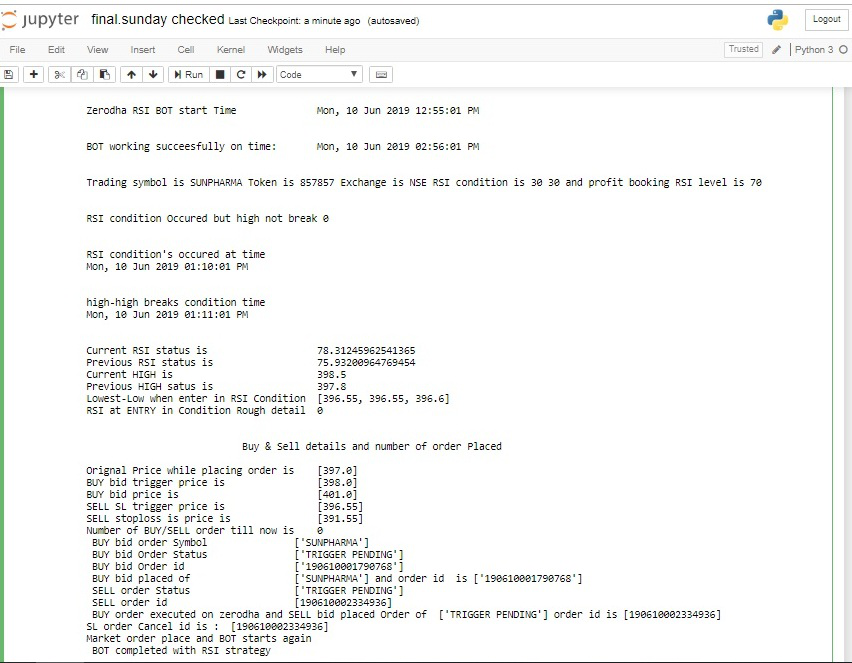

In [0]:
img